
# Part 1: Implement Logistic Regression


---



In [11]:
!pip install pandas-profiling==2.7.1

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import pandas_profiling as pp
plt.show()

from math import exp
from random import seed
from random import randrange
from csv import reader

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax, SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import regularizers,metrics



In [13]:
ls

 Ass1_Part2.ipynb                    DiabeteseModel.ipynb
 Assignment-1_Report.gdoc           'Machine_Learning_Overview(2).ipynb'
'Copy of Ass1_Part2.ipynb'           main.ipynb
'Copy of Assignment-1_Report.gdoc'   Untitled0.ipynb
 diabetes.csv


In [28]:
diabetesDF = pd.read_csv('diabetes.csv')
dataframe = pd.read_csv("diabetes.csv")
print(diabetesDF.head())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


In [15]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


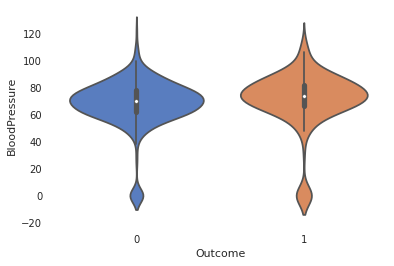

In [16]:
BP=sns.violinplot(x="Outcome", y="BloodPressure", data=diabetesDF, palette="muted", split=True)


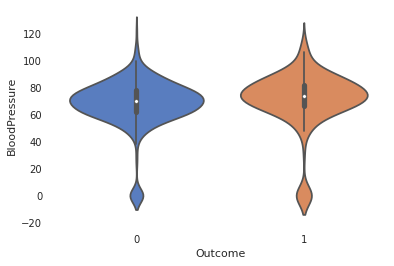

In [17]:
BP=sns.violinplot(x="Outcome", y="BloodPressure", data=diabetesDF, palette="muted", split=True)


In [18]:
pp.ProfileReport(diabetesDF)
#Please restart runtime and run this again if this throws an error

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


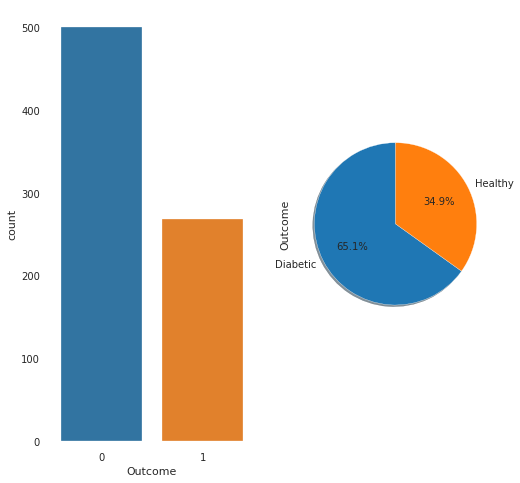

In [19]:
# countplot----Plot the frequency of the Outcome

fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

#It shows the count of observations in each categorical bin using bars

sns.countplot(diabetesDF['Outcome'],ax=ax1[0])

#Find the % of diabetic and Healthy person

labels = 'Diabetic', 'Healthy'

diabetesDF.Outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

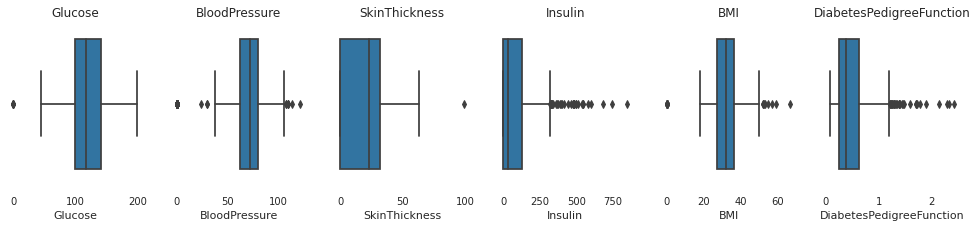

In [20]:
# boxplot

fig=plt.figure(figsize=(20,3))

for i in np.arange(1,7):
    data3=plt.subplot(1,7,i,title=diabetesDF.columns[i])
    sns.boxplot(diabetesDF[diabetesDF.columns[i]])

In [21]:
column=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
 
#convert all string to float
for i in column:
  diabetesDF[i] = diabetesDF[i].astype(float)

# # Rescale dataset columns to the range 0-1

scaler = StandardScaler()
# scaler = MinMaxScaler()
outcome= diabetesDF['Outcome']
diabetesDF_2 = diabetesDF.drop('Outcome', 1)
diabetesDF = pd.DataFrame(scaler.fit_transform(diabetesDF_2), columns=column)
diabetesDF['Outcome']=outcome

diabetesDF.head()

Pregnancies   Glucose  ...       Age  Outcome
0     0.639947  0.848324  ...  1.425995        1
1    -0.844885 -1.123396  ... -0.190672        0
2     1.233880  1.943724  ... -0.105584        1
3    -0.844885 -0.998208  ... -1.041549        0
4    -1.141852  0.504055  ... -0.020496        1

[5 rows x 9 columns]

In [22]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
  kf = KFold(n_splits = 5, shuffle = True, random_state=2)
  result = next(kf.split(dataset), None)
  train_set1 = dataset.iloc[result[0]]
  test_set1 = dataset.iloc[result[1]]
  test_set2 = test_set1.drop('Outcome', 1)
  test_set2['Outcome']=None
  
  scores = list()
  predicted = algorithm(train_set1, test_set2, *args)
  actual = test_set1['Outcome'].tolist()
  # print(actual)  
  accuracy = accuracy_score(actual, predicted)
  scores.append(accuracy)
  # print(f1_score(test_set2, predicted, average="macro"))
  # print(precision_score(test_set2, predicted, average="macro"))
  # print(recall_score(test_set2, predicted, average="macro"))

  return accuracy
 

In [23]:
# Make a prediction with coefficients - Sigmoid Funciton
def predict(row, coefficients):
	y_out = coefficients[0]
	for i in range(len(row)-1):
		y_out += coefficients[i + 1] * row[i]
	return 1.0 / (1.0 + exp(-y_out))

In [24]:
# Estimate logistic regression coefficients using stochastic gradient descent
def stochastic_gradient_descent(train, learning_rate, epochs):
  Coeff = [0.0 for i in range(len(train.iloc[0]))]  
  for epoch in range(epochs):
    sum_of_error = 0
    for (idx, rows) in train.iterrows():
      row=[rows.Pregnancies,rows.Glucose,rows.BloodPressure,rows.SkinThickness,rows.Insulin,rows.BMI,rows.DiabetesPedigreeFunction,rows.Age,rows.Outcome]
      y_out = predict(row, Coeff)
      error = row[-1] - y_out
      sum_of_error += error**2
      Coeff[0] = Coeff[0] + learning_rate * error * y_out * (1.0 - y_out)
      for i in range(len(row)-1):
        Coeff[i + 1] = Coeff[i + 1] + learning_rate * error * y_out * (1.0 - y_out) * row[i]
      print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, learning_rate, sum_of_error))
  return Coeff

In [25]:

# Linear Regression Algorithm With Stochastic Gradient Descent
def logistic_regression(train, test, learning_rate, epochs):
  predictions = list()
  Coeff = stochastic_gradient_descent(train, learning_rate, epochs)
  for (idx, rows) in test.iterrows():
    row=[rows.Pregnancies,rows.Glucose,rows.BloodPressure,rows.SkinThickness,rows.Insulin,rows.BMI,rows.DiabetesPedigreeFunction,rows.Age,rows.Outcome]
    y_out = predict(row, Coeff)
    y_out = round(y_out)
    predictions.append(y_out)
  return(predictions)

In [ ]:
seed(1)
dataset = diabetesDF

# evaluate algorithm
n_folds = 5
learning_rate = 0.2
epochs = 10000
scores = evaluate_algorithm(dataset, logistic_regression, n_folds, learning_rate, epochs)
print('Accuracy: %.3f%%' % (scores*100))

# Part 2: Implement Neural Networks


---

In [ ]:
dataframe.SkinThickness.replace(0, dataframe.SkinThickness.median(), inplace=True)
dataframe.Insulin.replace(0, dataframe.Insulin.median(), inplace=True)
dataframe.Glucose.replace(0, dataframe.Glucose.median(), inplace=True)
dataframe.BloodPressure.replace(0, dataframe.BloodPressure.median(), inplace=True)
dataframe.BMI.replace(0, dataframe.BMI.median(), inplace=True)

In [30]:
df_label = dataframe['Outcome']
df_features = dataframe.drop('Outcome', 1)
df_features.replace('?', -99999, inplace=True)

In [31]:
label = []
for lab in df_label:
    if lab == 1:
        label.append([1, 0])  # class 1
    elif lab == 0:
        label.append([0, 1])  # class 0

In [32]:
data = np.array(df_features)
label = np.array(label)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.30, random_state=5)

In [ ]:
model = Sequential()
model.add(Dense(500, input_dim=8, activation='sigmoid', kernel_regularizer=regularizers.l2(0.00001)))#500,
model.add(Dropout(0.2))
model.add(Dense(100, activation='sigmoid', kernel_regularizer=regularizers.l2(0.00001)))#100,
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax',kernel_regularizer=regularizers.l2(0.00001)))#2,

adam = Adam(lr=0.00001)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
# model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

history=model.fit(x_train,y_train, epochs=5000, batch_size=10, validation_data=(x_test, y_test))#10000

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("Accuracy :", results[1]*100,"%")

In [ ]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()